##   NN tools, Visualization, Printing and Plotting

In [0]:
import numpy as np
import keras
from IPython.display import SVG
from IPython.display import display
from keras.utils.vis_utils import model_to_dot
from sympy import *
init_printing(use_latex=True)
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


# XOR Multi-layer net with Relu hidden layer

In [0]:
#XOR avoiding zero input pattern for stable learning behavior
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
#display(Matrix(X))
Y = np.array([0,1,1,0])
#display(Matrix(Y))

#Multi-laye net with ReLU hidden layer
model = keras.models.Sequential()
model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(30, activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(30, activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

"""
model.add(keras.layers.Dense(8, activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(4, activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(2, activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

"""
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

#for i in model.get_weights():
    #display(Matrix(i))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 31        
Total params: 1,057
Trainable params: 1,057
Non-trainable params: 0
_________________________________________________________________
None


##  Prediction Visualization of Network Behavior

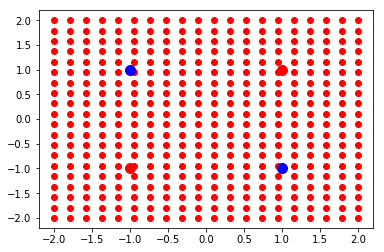

In [0]:
xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T


#color those points by the classification label
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.title('Prediction Visuzalization')
plt.show()

#   Training model

In [0]:
#Training Parameters
batch_size = 1
epochs = 1300
history = model.fit(X,Y,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 0,)

##  Model loss

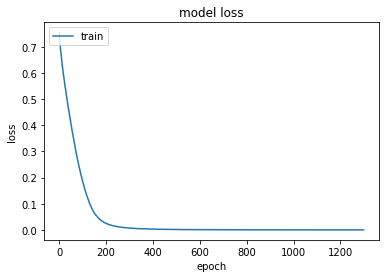

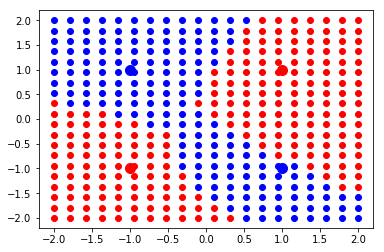

In [0]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.title('Visualize of Final Decision Boundary')
plt.show()
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

# problem 1 Model Accuracy

In [0]:
score = model.evaluate(X,Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 706us/step
Test loss: 8.5160798335e-05
Test accuracy: 1.0


# Shrinked down MultiLayer network XOR

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 2)                 6         
_________________________________________________________________
dense_6 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 13        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None


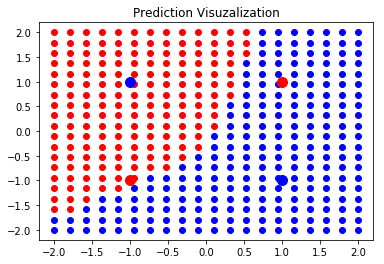

In [0]:
#XOR avoiding zero input pattern for stable learning behavior
X = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])
#display(Matrix(X))
Y = np.array([0,1,1,0])
#display(Matrix(Y))

#Multi-laye net with ReLU hidden layer
model = keras.models.Sequential()
model.add(keras.layers.Dense(2,input_dim=2,activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(12, activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))

model.add(keras.layers.Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

xpoints = np.linspace(-2,2,20)
ypoints = np.linspace(-2,2,20)
xgrid, ygrid = np.meshgrid(xpoints,ypoints)
positions = np.vstack([xgrid.ravel(),ygrid.ravel()]).T

####PREDICTION#####
#color those points by the classification label
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.title('Prediction Visuzalization')
plt.show()


#   Training and Model loss

In [0]:
#Training Parameters
batch_size = 1
epochs = 1300
history = model.fit(X,Y,
                   batch_size = batch_size,
                   epochs = epochs,
                   verbose = 0,)

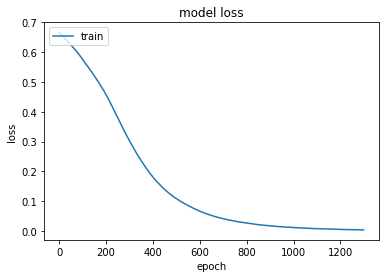

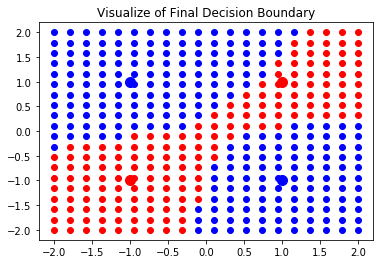

4/4 [==============================] - 0s 13ms/step
Test loss: 0.00393701065332
Test accuracy: 1.0


In [0]:
#summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

# Let's color those points by the classification labels...
predictions = model.predict_classes(positions)[:,0]
zeros = positions[predictions==0,:]
ones = positions[predictions==1,:]
# Color predictions by class
plt.plot(zeros[:,0],zeros[:,1],'ro')
plt.plot(ones[:,0],ones[:,1],'bo')
# Color the zero-expected outputs red
plt.plot(X[[0,3],0],X[[0,3],1],'ro',markersize=10)
# Color the one-expected outputs blue
plt.plot(X[[1,2],0],X[[1,2],1],'bo',markersize=10)
plt.title('Visualize of Final Decision Boundary')
plt.show()

score = model.evaluate(X,Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#    .3 Model Accuracy

In [0]:
score = model.evaluate(X,Y, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4/4 [==============================] - 0s 2ms/step
Test loss: 0.00393701065332
Test accuracy: 1.0


#   4).

Relu provides us with the ability have a nonlinear function that doesnt saturate - the d/dx is always just 1 for x > 0, so it acts as an identity function if we were doing backprop. Our gradients wont vanish away, also the the initializing of the bias. ReLU make our network alittle larger becuase we can use the advantage of having more more sparse representation. Therefore makes out network much larger in size, since our gradients are not vanishing , can still search in ourspace. 

#   5).

#   Classifying MNIST

In [0]:
from keras.datasets import mnist

# 0 - 9 = 10 classes
num_classes = 10

#input img dimensions
img_rows, img_cols = 28, 28

#data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], img_rows * img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows * img_cols)

#data normalization (0-255 is encoded as 0-1 )
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

#convert class vector to binary class matrix
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

#shape infor
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 784)
y_train shape: (60000, 10)
60000 train samples
10000 test samples


#   Building Multi-later network using Hyberbolic tangent

In [0]:
""" #feed forward network
model = keras.models.Sequential()

#linear
model.add(keras.layers.Dense(400, activation='softmax',input_shape=[x_train.shape[1]]))
#hidden layers
model.add(keras.layers.Dense(400, activation='tanh'))
#model.add(keras.layers.Dense(100, activation='tanh'))
#model.add(keras.layers.Dense(80, activation='tanh'))
#model.add(keras.layers.Dense(40, activation='tanh'))
#model.add(keras.layers.Dense(80, activation='tanh'))
#model.add(keras.layers.Dense(100, activation='tanh'))
model.add(keras.layers.Dense(300, activation='tanh'))
model.add(keras.layers.Dense(170, activation='tanh'))
model.add(keras.layers.Dense(170, activation='tanh'))
model.add(keras.layers.Dense(250, activation='tanh'))

#output layer
model.add(keras.layers.Dense(10, activation='softmax'))


model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
model.summary()
"""
#much better model than above and gets 98% 
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation='tanh', input_shape=[x_train.shape[1]]))
model.add(keras.layers.Dense(210,activation = 'tanh'))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.summary()

#RMSprop() seems to be better than Adam() in this net.
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 210)               63210     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2110      
Total params: 300,820
Trainable params: 300,820
Non-trainable params: 0
_________________________________________________________________


#   Training

In [0]:
batch_size = 128
epochs = 30
history = model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=0,
                   validation_split=0.2)
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

10000/10000 [==============================] - 1s 104us/step
Test loss: 0.117225008111
Test accuracy: 0.9806


#   plotting Model Accuracy and Model loss

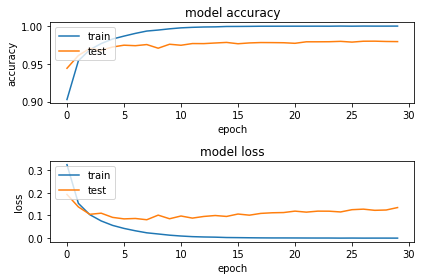

In [0]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [0]:
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

10000/10000 [==============================] - 1s 102us/step
Test loss: 0.117225008111
Test accuracy: 0.9806


In [0]:
#SVG(model_to_dot(model).create(prog='dot', format='svg'))

#   Building Multi-layer Network with ReLU units MNIST

In [0]:
""" relu_model = keras.models.Sequential()

#linear
relu_model.add(keras.layers.Dense(400, activation='softmax',input_shape=[x_train.shape[1]]))
#hidden layers
relu_model.add(keras.layers.Dense(350, activation='relu'))
#model.add(keras.layers.Dense(100, activation='tanh'))
#model.add(keras.layers.Dense(80, activation='tanh'))
#model.add(keras.layers.Dense(40, activation='tanh'))
#model.add(keras.layers.Dense(80, activation='tanh'))
#model.add(keras.layers.Dense(100, activation='tanh'))
relu_model.add(keras.layers.Dense(250, activation='relu'))
relu_model.add(keras.layers.Dense(250, activation='relu'))
relu_model.add(keras.layers.Dense(150, activation='relu'))
relu_model.add(keras.layers.Dense(250, activation='relu'))

#output layer
relu_model.add(keras.layers.Dense(10, activation='softmax'))


relu_model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer=keras.optimizers.Adam(),
             metrics=['accuracy'])
relu_model.summary()
"""

relu_model = keras.models.Sequential()
relu_model.add(keras.layers.Dense(300, activation='relu', input_shape=[x_train.shape[1]]))
relu_model.add(keras.layers.Dense(210,activation='relu'))
relu_model.add(keras.layers.Dense(num_classes, activation='softmax'))
relu_model.summary()

#RMSprop() seems to be better than Adam() in this net.
relu_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 210)               63210     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2110      
Total params: 300,820
Trainable params: 300,820
Non-trainable params: 0
_________________________________________________________________


#   Training

In [0]:
batch_size=128
epochs=30
history = relu_model.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=0,
                   validation_split=0.2)
score = relu_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:',score[0])
print('Test accuracy:',score[1])

10000/10000 [==============================] - 1s 102us/step
Test loss: 0.108127264471
Test accuracy: 0.9816


#   Plotting Model loss and Accuracy 

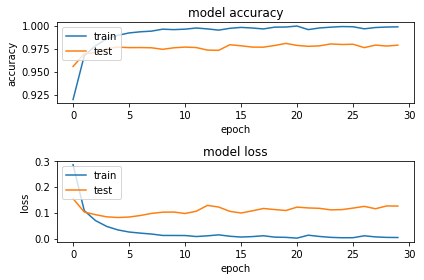

In [0]:
plt.figure(1)
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [0]:
relu_score = relu_model.evaluate(x_test, y_test, verbose=1)
print('Test loss:',relu_score[0])
print('Test accuracy:',relu_score[1])

10000/10000 [==============================] - 1s 98us/step
Test loss: 0.108127264471
Test accuracy: 0.9816


#   7).

With the way my network is setup currently , wide/deep neural network, i did not notice much differences from numbers 5 and 6. when the network was much simpler, having only one hidden layer i did notice that ReLU resulted in higher Accuracy than the tanh function. Comparing number 4 and 5, i belive using relu gives us some sort of sparsity, when a <= 0, the more units in a layer the more sparse the resulting representation is. Tanh is always likely to generate some no zero value resulting in dense representations. sparse reps seems to be more benefical than dense reps.Although relu does sort of blow up on activation, nothing to constrain the ouput of the neuron. 